In [1]:
import sys
from os.path import join, abspath
from glob import glob
import numpy as np
import vaex
from tqdm import tqdm
import matplotlib.pyplot as plt
from time import time
from scipy.optimize import curve_fit
from scipy.stats import norm, skewnorm

In [2]:
# import utils
root_dir = abspath(join('..'))
root_dir

'/home2/s20321005/Thesis-Project'

In [3]:
if root_dir not in sys.path:
    sys.path.append(root_dir)
sys.path

['/home2/s20321005/Thesis-Project/6_Analisis',
 '/home2/s20321005/.conda/envs/vaex/lib/python38.zip',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/lib-dynload',
 '',
 '/home2/s20321005/.local/lib/python3.8/site-packages',
 '/home2/s20321005/.conda/envs/vaex/lib/python3.8/site-packages',
 '/home2/s20321005/Thesis-Project']

In [4]:
from utils import style, hdi, load_spectral_types

In [5]:
sp = load_spectral_types()
sp

,SpT,M_J,J-H,H-Ks,J-K
0,O9V,-3.44,-0.164,-0.071,-0.235
1,O9.5V,-3.30,-0.161,-0.069,-0.230
2,B0V,-3.17,-0.159,-0.067,-0.226
3,B0.5V,-2.80,-0.153,-0.063,-0.216
4,B1V,-2.33,-0.148,-0.059,-0.207
...,...,...,...,...,...
95,T6V,15.34,0.100,-0.030,0.070
96,T7V,15.83,0.000,0.000,0.000
97,T7.5V,16.61,0.200,-0.050,0.150
98,T8V,17.30,0.200,-0.050,0.150


In [6]:
style(name="seaborn-notebook")

In [7]:
root_data_dir = abspath(join(root_dir, "Data"))
root_data_dir

'/home2/s20321005/Thesis-Project/Data'

In [8]:
data_baryon_dir = join(root_data_dir, "Baryon")
# load baryons components
df_baryon = vaex.open(join(data_baryon_dir, "baryon.hdf5"))
rhos = df_baryon["rho"].to_numpy()  # Msun/pc^3
sigmaz = df_baryon["sigma_z"].to_numpy() # km/s

e_rhos = df_baryon["e_rho"].to_numpy()  # Msun/pc^3
e_sigmaz = df_baryon["e_sigma_z"].to_numpy() # km/s
dpi=100

In [9]:
eff_vol = glob(join(root_data_dir, 'Effective-Volume', 'no', "z*"))
eff_vol.sort()
eff_vol

['/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(-0.00)_(0.11).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.11)_(0.16).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.16)_(0.19).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.19)_(0.22).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.22)_(0.24).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.24)_(0.27).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.27)_(0.29).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.29)_(0.31).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.31)_(0.32).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.32)_(0.34).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.34)_(0.36).hdf5',
 '/home2/s20321005/Thesis-Project/Data/Effective-Volume/no/z_(0.36)_(0.37).hdf5']

In [10]:
import re
c1, c2 = [], []
# get the value between () of the file name
for f in eff_vol:
    c1.append(float(re.findall(r'\((.*?)\)', f)[0]))
    c2.append(float(re.findall(r'\((.*?)\)', f)[1]))
c1 = np.array(c1)
c2 = np.array(c2)
color = 0.5*(c1+c2)
color

array([0.055, 0.135, 0.175, 0.205, 0.23 , 0.255, 0.28 , 0.3  , 0.315,
       0.33 , 0.35 , 0.365])

In [11]:
mcmc_dir = join(root_data_dir, "MCMC-no", "dddm", "data")
mcmc_dir

'/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data'

In [13]:
files = glob(join(mcmc_dir, "chain-*"))
files.sort()
files

['/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(-0.00)_(0.11).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.11)_(0.16).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.16)_(0.19).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.19)_(0.22).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.22)_(0.24).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.24)_(0.27).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.27)_(0.29).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.29)_(0.31).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.31)_(0.32).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.32)_(0.34).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.34)_(0.36).npy',
 '/home2/s20321005/Thesis-Project/Data/MCMC-no/dddm/data/chain-(0.36)_(0.37).npy']

## tes

In [14]:
index = 0
df = np.load(files[index])
df.shape

(500, 360, 36)

In [15]:
rhob = df[:, :, 12:24]
rhob = rhob.reshape(-1, 12)
rhob = rhob.sum(axis=1)/1E-2
rhoDM = df[:, :, 24].reshape(-1)/1E-2
sigmaDD = df[:, :, 25].reshape(-1)
log_hDD = df[:, :, 26].reshape(-1)
rhoD = rhoDM + sigmaDD/(4*np.exp(log_hDD))/1E-2
length = len(rhob)
rhob0 = np.empty((length, 12))
for i in range(12):
    rhob0[:,i] = norm.rvs(loc=rhos[i], scale=e_rhos[i], size=length)
rhob0 = rhob0.sum(axis=1)/1E-2

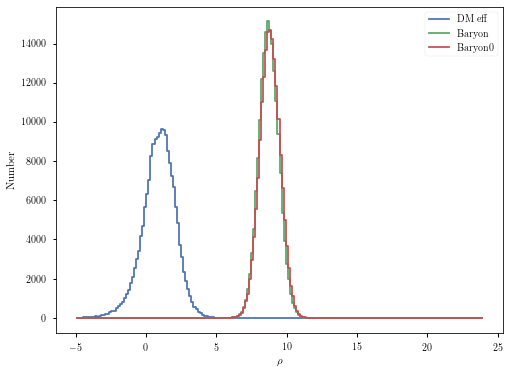

In [16]:
rho = np.linspace(-5, 24, 200)
rhoD_num, _ = np.histogram(rhoD, bins=rho)
rhob_num, _ = np.histogram(rhob, bins=rho)
rhob0_num, _ = np.histogram(rhob0, bins=rho)
rhomid = 0.5*(rho[1:] + rho[:-1])
# plot step
fig, ax = plt.subplots(figsize=(8, 6))
ax.step(rhomid, rhoD_num, label='DM eff')
ax.step(rhomid, rhob_num, label='Baryon')
ax.step(rhomid, rhob0_num, label='Baryon0')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel('Number')
ax.legend()
plt.show()

In [17]:
rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
rhoD_fit = skewnorm.fit(rhoD_sample)
rhob_sample = np.random.choice(rhob, size=10_000)
rhob_fit = skewnorm.fit(rhob_sample)
rhob0_sample = np.random.choice(rhob0, size=10_000)
rhob0_fit = norm.fit(rhob0_sample)

((0.6091294758799428, 8.497544329077122, 0.7756763254004138),
 (8.89811548375109, 0.7160039153464514))

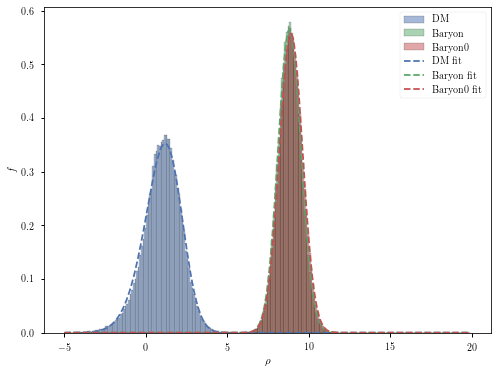

In [18]:
# plot
rho = np.arange(-5, 20, 0.1)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoD, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
rhob_fit, rhob0_fit

rhoD = 1.17 +1.06/-1.20
rhob = 8.80 +0.71/-0.69
rhob0 = 8.90 +0.71/-0.71


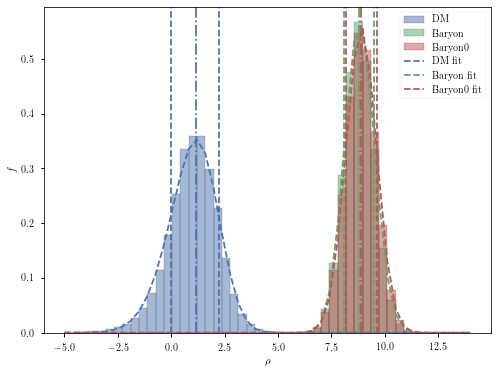

In [19]:
sigma = np.array([68, 90, 95])
alpha = 1 - sigma/100

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), -3, 7, alpha=alpha[0])
rhoD_mode = modes[0]
rhoD_low, rhoD_high = hpd[0]

hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 12.5, alpha=alpha[0])
rhob_mode = modes[0]
rhob_low, rhob_high = hpd[0]

hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), 5, 12.5, alpha=alpha[0])
rhob0_mode = modes[0]
rhob0_low, rhob0_high = hpd[0]

# plot
rho = np.linspace(-5, 14, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhoDM, bins=rho, density=True, label='DM', ec='k', alpha=0.5, color='C0')
ax.hist(rhob, bins=rho, density=True, label='Baryon', ec='k', alpha=0.5,color='C1')
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, skewnorm.pdf(rho, *rhoD_fit), label='DM fit', color='C0',  ls='--')
ax.plot(rho, skewnorm.pdf(rho, *rhob_fit), label='Baryon fit', color='C1', ls='--')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhoD_mode, color='C0', ls='-.')
ax.axvline(rhob_mode, color='C1', ls='-.')
ax.axvline(rhob0_mode, color='C2', ls='-.')
ax.axvline(rhoD_low, color='C0', ls='--')
ax.axvline(rhoD_high, color='C0', ls='--')
ax.axvline(rhob_low, color='C1', ls='--')
ax.axvline(rhob_high, color='C1', ls='--')
ax.axvline(rhob0_low, color='C2', ls='--')
ax.axvline(rhob0_high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhoD = {rhoD_mode:.02f} +{rhoD_high-rhoD_mode:.02f}/-{rhoD_mode-rhoD_low:.02f}')
print(f'rhob = {rhob_mode:.02f} +{rhob_high-rhob_mode:.02f}/-{rhob_mode-rhob_low:.02f}')
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low:.02f}')

rhob0 = 8.90 +0.71/-0.71


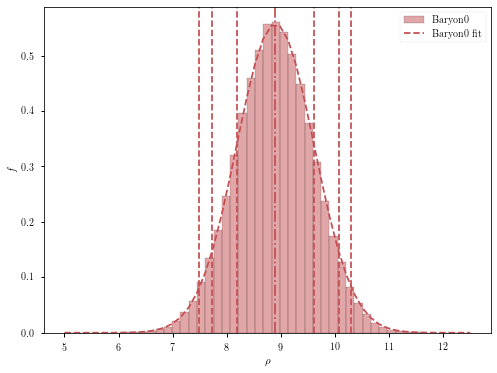

In [20]:
rhob0_low = []
rhob0_high = []
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: norm.pdf(x, *rhob0_fit), low=5, high=12.5, alpha=alp)
    low, high = hpd[0]
    rhob0_low.append(low)
    rhob0_high.append(high)
# plot
rho = np.linspace(5, 12.5, 50)
fig, ax = plt.subplots(figsize=(8, 6))
ax.hist(rhob0, bins=rho, density=True, label='Baryon0', ec='k', alpha=0.5, color='C2')
ax.plot(rho, norm.pdf(rho, *rhob0_fit), label='Baryon0 fit', color='C2', ls='--')
ax.axvline(rhob0_mode, color='C2', ls='-.')
for low, high in zip(rhob0_low, rhob0_high):
    ax.axvline(low, color='C2', ls='--')
    ax.axvline(high, color='C2', ls='--')
ax.set_xlabel(r'$\rho$')
ax.set_ylabel(r'$f$')
ax.legend()
print(f'rhob0 = {rhob0_mode:.02f} +{rhob0_high[0]-rhob0_mode:.02f}/-{rhob0_mode-rhob0_low[0]:.02f}')

In [22]:
from tqdm import tqdm

rhoD_modes = []
rhoD_errs = []
rhob_modes = []
rhob_errs = []
rhoD_fits = []

for file in tqdm(files):
    df = np.load(file)
    rhob = df[:, :, 12:24]
    rhob = rhob.reshape(-1, 12)
    rhob = rhob.sum(axis=1)/1E-2
    rhoD = df[:, :, 24].reshape(-1)/1E-2
    # print("fitting...")
    rhoD_sample = np.random.choice(rhoD, size=10_000, replace=False)
    rhoD_fit = skewnorm.fit(rhoD_sample)
    rhoD_fits.append(rhoD_fit)
    rhob_sample = np.random.choice(rhob, size=10_000, replace=False)
    rhob_fit = skewnorm.fit(rhob_sample)
    # print("calculating HDI...")
    rhoD_err = []
    rhob_err = []
    rhoD_mode = None
    rhob_mode = None
    for i, alp in enumerate(alpha):
        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhoD_fit), -5, 10, alpha=alp)
        rhoD_mode = modes[0]
        low, high = hpd[0]
        rhoD_err.append({'alpha': alp, 'low': low, 'high': high})

        hpd, modes = hdi(lambda x: skewnorm.pdf(x, *rhob_fit), 5, 15, alpha=alp)
        rhob_mode = modes[0]
        low, high = hpd[0]
        rhob_err.append({'alpha': alp, 'low': low, 'high': high})
    rhoD_errs.append(rhoD_err)
    rhob_errs.append(rhob_err)
    rhoD_modes.append(rhoD_mode)
    rhob_modes.append(rhob_mode)

100%|██████████| 12/12 [00:08<00:00,  1.43it/s]


In [23]:
rhoD_fits

[(-1.5736617124876762, 2.056877258846554, 1.5718983278342815),
 (-1.580402872056054, 2.967972460105324, 2.0379552743567313),
 (-1.3777916067018254, 0.7338043229461959, 1.8740984844572872),
 (-2.1463457292398997, 3.683075354174575, 2.1283527102812925),
 (-1.2175970095195319, 4.878741364479184, 1.9012610470461095),
 (-2.0910771628287366, 5.518843482403481, 2.2976965004780565),
 (-2.619527970557258, 4.834518004527907, 2.553073627607165),
 (-2.4094746192061254, 3.1276167764738716, 2.480336153392617),
 (0.9022116866887019, -1.2201504163114292, 2.295638137852535),
 (-1.9492961524517902, 3.6938597783565337, 2.4562405414625763),
 (0.0001593786845559914, 0.2767812415716511, 1.5477684038124087),
 (-0.709892385434775, 0.9470481592501376, 2.0720340639502384)]

(-2.0, 5.0)

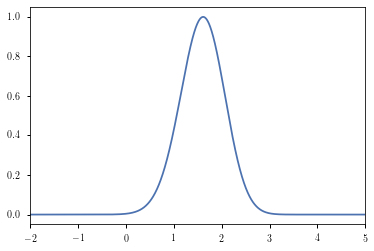

In [24]:
# multiplying the rhoDM, but it became addition in log
rho = np.linspace(-5, 14, 10000)
log_rhoD = None
for p in rhoD_fits:
    if log_rhoD is None:
        log_rhoD = skewnorm.logpdf(rho, *p)
    else:
        log_rhoD += skewnorm.logpdf(rho, *p)
# turn into rhoDM
rhoD_com = np.exp(log_rhoD)
# normalize with max value
rhoD_com /= rhoD_com.max()
# plot
fig, ax = plt.subplots()
ax.plot(rho, rhoD_com, label='rhoD')
ax.set_xlim(-2,5)

In [25]:
def skewpdf(x, *args):
    A, other = args[0], args[1:]
    return A*skewnorm.pdf(x, *other)

rhoD_com_fit, _ = curve_fit(skewpdf, rho, rhoD_com, p0=[1, 1.0, 2.0, 1])
rhoD_com_fit

array([ 1.1565471 , -0.8649974 ,  1.87143884,  0.54298065])

(-1.0, 5.0)

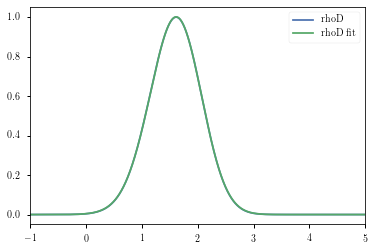

In [27]:
plt.plot(rho, rhoD_com, label='rhoD')
plt.plot(rho, skewpdf(rho, *rhoD_com_fit), label='rhoD fit')
plt.legend()
plt.xlim(-1,5)

In [50]:
rhoD_com_err = []
rhoD_com_mode = None
for i, alp in enumerate(alpha):
    hpd, modes = hdi(lambda x: skewpdf(x, *rhoD_com_fit), low=-1, high=5, alpha=alp)
    low, high = hpd[0]
    rhoD_com_err.append({'sigma':sigma, 'low': low, 'high': high})
    rhoD_com_mode = modes[0]
rhoD_com_mode, rhoD_com_err

(1.61,
 [{'sigma': array([68, 90, 95]), 'low': 1.15, 'high': 2.06},
  {'sigma': array([68, 90, 95]), 'low': 0.83, 'high': 2.35},
  {'sigma': array([68, 90, 95]), 'low': 0.67, 'high': 2.49}])

In [29]:
A9 = sp[sp['SpT'] == 'A9V']['J-K'].values[0]
F0 = sp[sp['SpT'] == 'F0V']['J-K'].values[0]
b1 = (A9+F0)/2

F9 = sp[sp['SpT'] == 'F9V']['J-K'].values[0]
G0 = sp[sp['SpT'] == 'G0V']['J-K'].values[0]
b2 = (F9+G0)/2
b1, b2

(0.1355, 0.314)

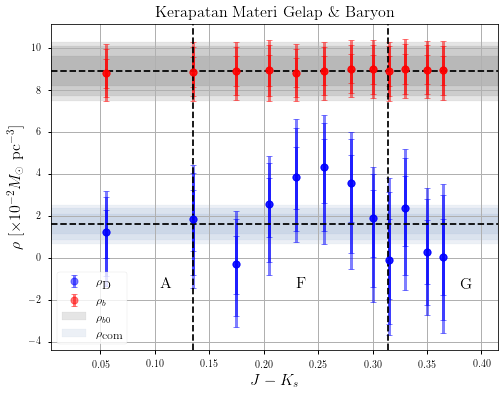

1.61

In [59]:
c = color
cs = np.linspace(c.min()-0.05, c.max()+0.05, 100)

fig, ax = plt.subplots(figsize=(8, 6))
ax.axhline(y=rhob0_mode, color='black', linestyle='--')
for i in range(3):
    low = np.array([err[i]['low'] for err in rhoD_errs])
    high = np.array([err[i]['high'] for err in rhoD_errs])
    dm_ax = ax.errorbar(c, rhoD_modes, yerr=[rhoD_modes-low, high-rhoD_modes], fmt='o', color='blue', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    low = np.array([err[i]['low'] for err in rhob_errs])
    high = np.array([err[i]['high'] for err in rhob_errs])
    rhob_ax = ax.errorbar(c, rhob_modes, yerr=[rhob_modes-low, high-rhob_modes], fmt='o', color='red', capsize=3, alpha=0.5, elinewidth=3, markeredgewidth=1)
    rhob0_ax = ax.fill_between(cs, rhob0_low[i], rhob0_high[i], color='black', alpha=0.1)
    rhoD_com_ax = ax.fill_between(cs, rhoD_com_err[i]['low'], rhoD_com_err[i]['high'], color='C0', alpha=0.1)
    if i == 2:
        ax.legend([dm_ax, rhob_ax, rhob0_ax, rhoD_com_ax], 
                  [r'$\rho_{\textup{D}}$', r'$\rho_{b}$', r'$\rho_{b0}$', r'$\rho_{\textup{com}}$'],
                  loc='best', fontsize=12)
# real value
ax.axhline(y=rhoD_com_mode, color='black', linestyle='--')

ax.axvline(x=b1, color='black', linestyle='--')
ax.axvline(x=b2, color='black', linestyle='--')
ax.text(0.105, -1.5, r'$\textup{A}$', fontsize=16)
ax.text(0.23, -1.5, r'$\textup{F}$', fontsize=16)
ax.text(0.38, -1.5, r'$\textup{G}$', fontsize=16)
ax.set_xlabel(r'$J-K_s$', fontsize=16)
ax.set_ylabel(r'$\rho$ [$\times 10^{-2}M_{\odot}\ $pc$^{-3}$]', fontsize=16)
ax.set_xlim(cs.min(), cs.max())
ax.set_title("Kerapatan Materi Gelap \& Baryon", fontsize=16)
ax.grid()
fig.savefig(join('img', 'rhoDM-dddm.pdf'), dpi=300)
plt.show()
rhoD_com_mode

In [235]:
rhoD_modes

[1.3495000000000013,
 3.2307500000000045,
 4.004562500000006,
 4.945625000000006,
 0.0,
 9.938812500000012,
 4.8501250000000065,
 1.9038125000000021,
 2.5760625000000026,
 2.4093750000000025,
 1.8058125000000023,
 2.072062500000002,
 2.888062500000003]